# Shark attacks



Please clean the attack.csv database and answer the following questions :
1. Print the top 10 countries by shark attacks
2. Print the top 10 activities by shark attakcs
3. Print & compare attacks by Male & Female

Base on your personal life and your exchange year in Melbourne (Australia):
4. ¿Can you estimate your probability of having a shark attack in all your swims?

In [1]:
import pandas as pd
import re
import numpy as np

**Data cleaning**

In [4]:
#First, we read the document and have a general view of the volume of data
df = pd.read_csv("attacks.csv", encoding = "ISO-8859-1")
df.shape

(25723, 24)

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#We have a clear view of the amount of null values
null_cols = df.isnull().sum()
null_cols[null_cols > 0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [7]:
#We eliminate duplicate values (if there are)
before = len(df)
data = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [8]:
#We get rid of useless columns
df.drop(['Unnamed: 22','Unnamed: 23','href formula','href','pdf',"original order"], axis=1, inplace=True)
#We get rid of the raws that contain all NaN values
df.dropna(how='all', inplace=True)
df


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#However we still see that we have columns with 0 in case number and NaN in the rest of the columns
df.replace({'Case Number': {"0": np.nan, "xx": np.nan}}, inplace=True)
df.dropna(how='all', inplace=True)

In [10]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND.0005,ND.0005
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND.0004,ND.0004
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND.0003,ND.0003
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND.0002,ND.0002


In [11]:
df['Case Number'] == df['Case Number.1']



0       True
1       True
2       True
3       True
4       True
        ... 
6297    True
6298    True
6299    True
6300    True
6301    True
Length: 6302, dtype: bool

In [12]:
df['Case Number'] == df['Case Number.2']

0       True
1       True
2       True
3       True
4       True
        ... 
6297    True
6298    True
6299    True
6300    True
6301    True
Length: 6302, dtype: bool

In [13]:
#After veryfying that the 3 colums are the the same we get ride of the duplicates columns
df.drop(['Case Number.1','Case Number.2'], axis=1, inplace=True)

In [69]:
df.to_csv('attacks_data_clean.csv')

**Question 1: What has been historically the top 10 countries with more shark attacks**


In [14]:
Topcountries = df.groupby('Country').count()['Case Number'].sort_values(ascending=False).head(10)
Topcountries



Country
USA                 2228
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
Name: Case Number, dtype: int64

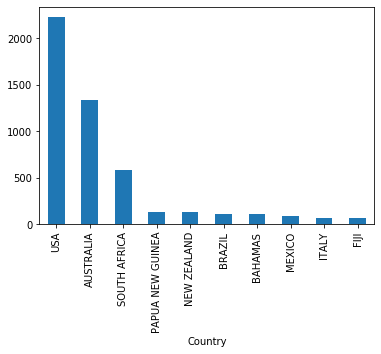

In [15]:
Topcountries.plot(kind='bar')

**Question 2: What has been historically the activities with more shark attacks?**

In [18]:
Topactivities = df.groupby('Activity').count()['Case Number'].sort_values(ascending=False).head(10)
Topactivities

Activity
Surfing         971
Swimming        869
Fishing         430
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Case Number, dtype: int64

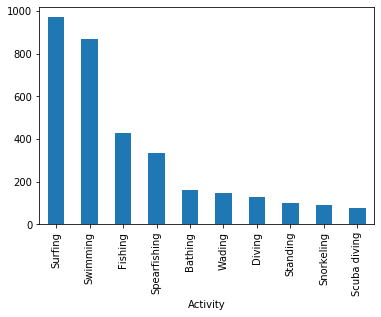

In [19]:
Topactivities.plot(kind='bar')

**Question 3: Print & compare attacks by Male & Female**

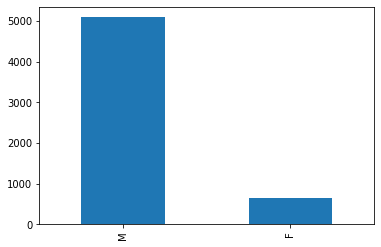

In [20]:
Sex=df['Sex '].value_counts().head(2)
Sex.plot(kind='bar')




**Question 4: ¿Can you estimate your probability of having a shark attack in all your swims?**

In [23]:
df['Date'] = df['Date'].astype(str)

def find_year(date):
    try:
        year = [int(i) for i in list(re.findall(r'.*([1-3][0-9]{3})', date))]
        return int(np.mean(year))
    except:
        return 0

df['Year'] = df['Date'].apply(find_year)



In [39]:
filtered_df = df[(df['Country'] == "AUSTRALIA") & (df['Year'] == 2014)]
filtered_df.count()

Case Number               29
Date                      29
Year                      29
Type                      29
Country                   29
Area                      29
Location                  29
Activity                  28
Name                      29
Sex                       28
Age                       19
Injury                    29
Fatal (Y/N)               27
Time                      22
Species                   20
Investigator or Source    29
dtype: int64

In [42]:
len(filtered_df.index)

29

In [70]:
#Assumptions:
#1 I assume all beaches have the same probability of having a shark attack and the the variable time is the one that affects being attack. That is why traditionally surfers are the most attack.Since the spent more time on the beach


DaysinAustralia = 365
Estimamted_days_beach_OZ = 60
Estimamted_days_beach_Alvaro = 90
Estimated_hours_in_water_by_swim_Alvaro=1.5
Estimated_hours_in_water_by_swim_OZ = 2
Attacks_Australia_2019 = len(filtered_df.index)
Population_australia = 25499884

Alvaro_Prob_of_being_attack = Attacks_Australia_2019/Population_australia*Estimated_hours_in_water_by_swim_Alvaro/Estimated_hours_in_water_by_swim_OZ*Estimamted_days_beach_Alvaro/Estimamted_days_beach_OZ*100
print("The probability of Alvaro having a shark attack during 2014 was" + " " + str(Alvaro_Prob_of_being_attack))

**The probability of Alvaro having a shark attack during 2014 was** 0.00012794175848015625


**Question 4.1: If instead of going to the beach 90 days you went every day of the year. ¿What is the probability?**

In [68]:
Alvaro_Prob_of_being_attack365=Alvaro_Prob_of_being_attack * 365 /90
print("The probability of Alvaro having a shark attack during 2014 was" + " " + str(Alvaro_Prob_of_being_attack365))

The probability of Alvaro having a shark attack during 2014 was 0.0005188749093917449
